<a href="https://colab.research.google.com/github/Miky-Bareiro/challenge1-data-science-latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [21]:
# Importamos las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [23]:
# Cargamos los datos de las tiendas
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [40]:
# Revisamos las columnas de cada DataFrame para identificar la columna correcta de precio
print("Columnas de Tienda 1:", tienda1.columns.tolist())
print("Columnas de Tienda 2:", tienda2.columns.tolist())
print("Columnas de Tienda 3:", tienda3.columns.tolist())
print("Columnas de Tienda 4:", tienda4.columns.tolist())

Columnas de Tienda 1: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Columnas de Tienda 2: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Columnas de Tienda 3: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Columnas de Tienda 4: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']


In [41]:
# Verificamos también las primeras filas para entender la estructura de los datos
print("\nPrimeras filas de Tienda 1:")
print(tienda1.head())


Primeras filas de Tienda 1:
            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de crédito                   8   4.60971 -74.081

#1. Análisis de facturación



In [ ]:
# PARTE 1: ANÁLISIS DE FACTURACIÓN
print("\n===== PARTE 1: ANÁLISIS DE FACTURACIÓN =====")


===== PARTE 1: ANÁLISIS DE FACTURACIÓN =====


In [42]:
# Función para calcular la facturación usando la columna correcta
def calcular_facturacion(df):
    # Si existe una columna específica para precios
    if 'precio' in df.columns:
        return df['precio'].sum()
    elif 'precios' in df.columns:
        return df['precios'].sum()
    elif 'valor' in df.columns:
        return df['valor'].sum()
    # Si no hay columna de precio explícita, intentamos calcular precio × cantidad
    elif 'precio_unitario' in df.columns and 'cantidad' in df.columns:
        return (df['precio_unitario'] * df['cantidad']).sum()
    else:
        # Buscamos cualquier columna que pueda contener información de precio
        for col in df.columns:
            if 'prec' in col.lower():
                return df[col].sum()

        # Si llegamos aquí, no encontramos una columna adecuada
        raise ValueError("No se encontró una columna de precio adecuada")


Facturación calculada:
Tienda 1: $1150880400.00
Tienda 2: $1116343500.00
Tienda 3: $1098019600.00
Tienda 4: $1038375700.00


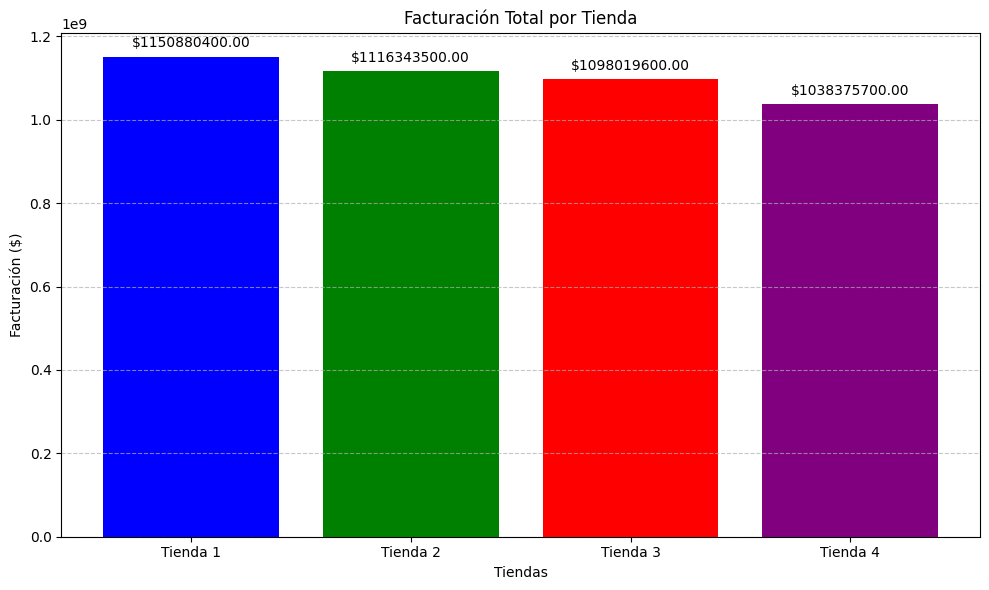

La tienda con menor facturación es Tienda 4 con $1038375700.00


In [45]:
# Intentamos calcular la facturación para cada tienda
try:
    facturacion_tienda1 = calcular_facturacion(tienda1)
    facturacion_tienda2 = calcular_facturacion(tienda2)
    facturacion_tienda3 = calcular_facturacion(tienda3)
    facturacion_tienda4 = calcular_facturacion(tienda4)

    print("\nFacturación calculada:")
    print(f"Tienda 1: ${facturacion_tienda1:.2f}")
    print(f"Tienda 2: ${facturacion_tienda2:.2f}")
    print(f"Tienda 3: ${facturacion_tienda3:.2f}")
    print(f"Tienda 4: ${facturacion_tienda4:.2f}")

    # Creamos un diccionario para almacenar los resultados
    facturacion = {
        'Tienda 1': facturacion_tienda1,
        'Tienda 2': facturacion_tienda2,
        'Tienda 3': facturacion_tienda3,
        'Tienda 4': facturacion_tienda4
    }

    # Visualizamos los resultados con un gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(facturacion.keys(), facturacion.values(), color=['blue', 'green', 'red', 'purple'])
    plt.title('Facturación Total por Tienda')
    plt.xlabel('Tiendas')
    plt.ylabel('Facturación ($)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Añadir los valores encima de cada barra
    for i, (tienda, valor) in enumerate(facturacion.items()):
        plt.text(i, valor + valor*0.02, f'${valor:.2f}', ha='center')

    plt.tight_layout()
    plt.show()

    # Usando operadores lógicos para identificar la tienda con menor facturación
    tienda_menor_facturacion = None
    menor_valor = float('inf')

    for tienda, valor in facturacion.items():
        if valor < menor_valor:
            menor_valor = valor
            tienda_menor_facturacion = tienda

    print(f"La tienda con menor facturación es {tienda_menor_facturacion} con ${menor_valor:.2f}")

except Exception as e:
    print(f"Error al calcular la facturación: {e}")
    print("Vamos a imprimir más información para depurar:")
    for tienda_num, df in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
        print(f"\nTienda {tienda_num} - Columnas: {df.columns.tolist()}")
        print(f"Tipos de datos: {df.dtypes}")
        print(f"Muestra: \n{df.head(2)}")

# 2. Ventas por categoría

In [28]:
# PARTE 2: VENTAS POR CATEGORÍA
print("\n===== PARTE 2: VENTAS POR CATEGORÍA =====")


===== PARTE 2: VENTAS POR CATEGORÍA =====


Advertencia: No se encontró la columna 'categoria' en Tienda 1. Columnas disponibles: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Advertencia: No se encontró la columna 'categoria' en Tienda 2. Columnas disponibles: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Advertencia: No se encontró la columna 'categoria' en Tienda 3. Columnas disponibles: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Advertencia: No se encontró la columna 'categoria' en Tienda 4. Columnas disponibles: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor

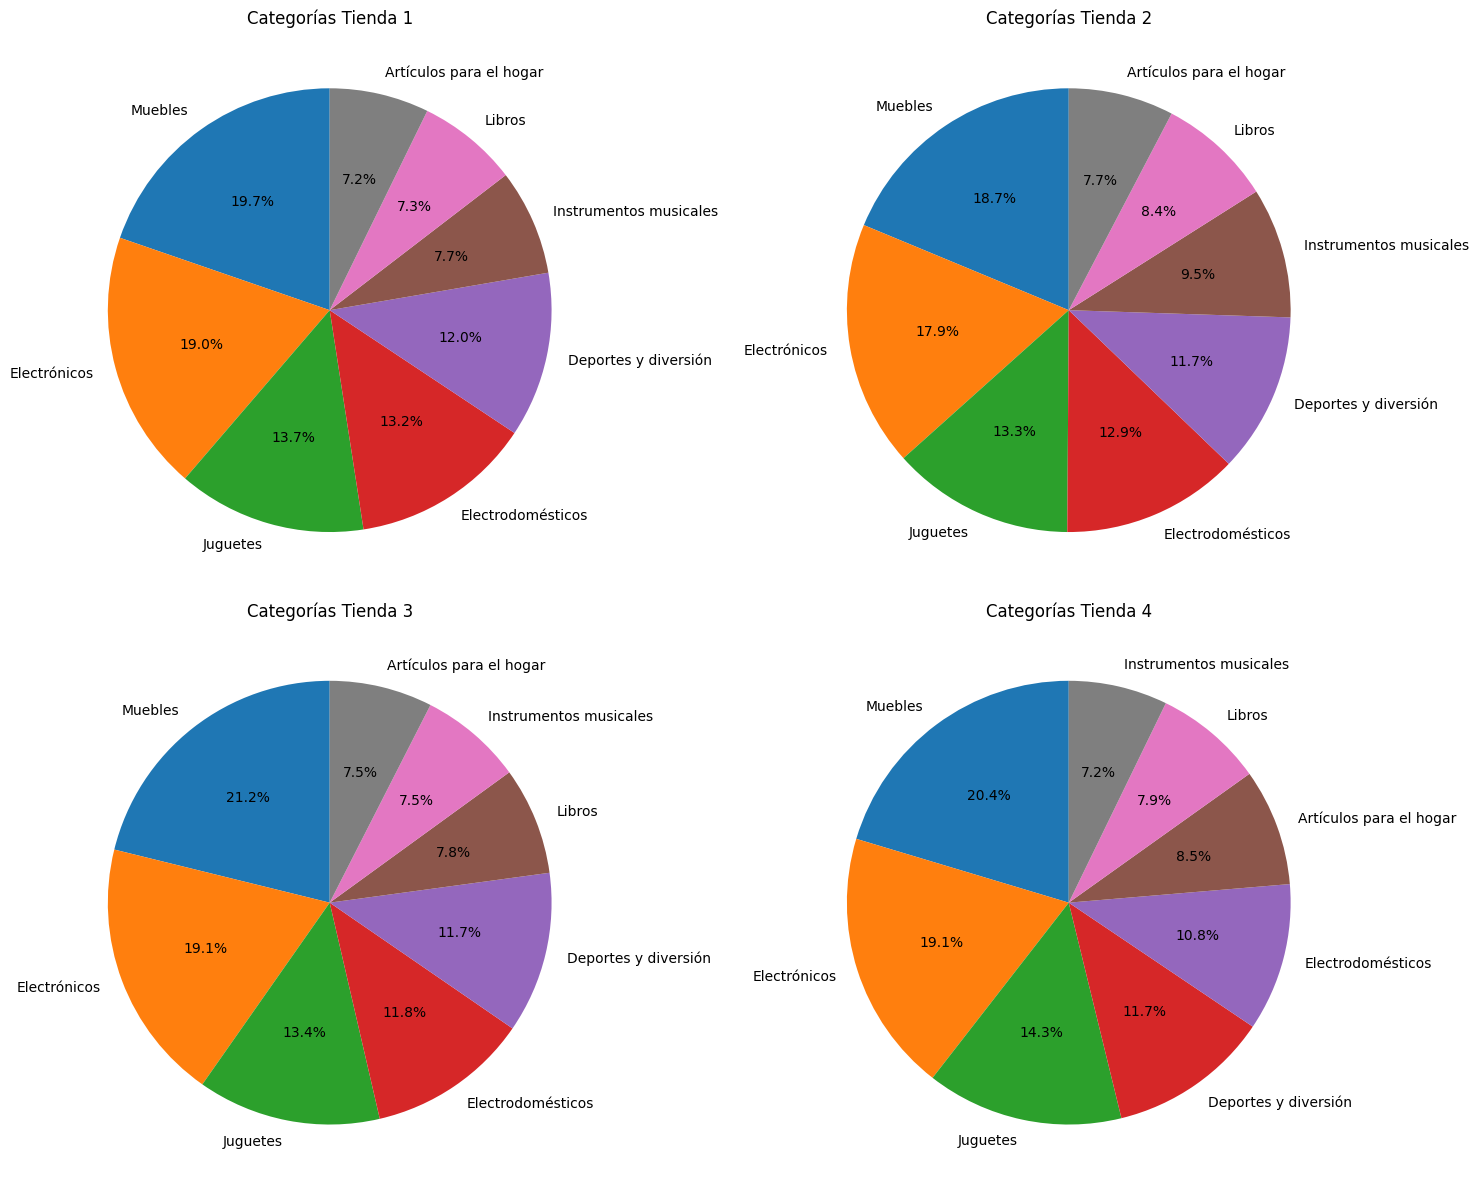

In [47]:
# Verificamos si existe la columna 'categoria' en cada DataFrame
for i, df in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
    if 'categoria' not in df.columns:
        print(f"Advertencia: No se encontró la columna 'categoria' en Tienda {i}. Columnas disponibles: {df.columns.tolist()}")

# Función para contar ventas por categoría con manejo de errores
def ventas_por_categoria(tienda_df, nombre_tienda):
    categoria_col = None

    # Buscar la columna adecuada
    for col in tienda_df.columns:
        if 'categ' in col.lower():
            categoria_col = col
            break

    if categoria_col:
        categorias = tienda_df[categoria_col].value_counts()
        return categorias, nombre_tienda
    else:
        print(f"No se encontró una columna de categoría en {nombre_tienda}")
        return pd.Series(), nombre_tienda

# Obtenemos las ventas por categoría para cada tienda
categorias_tienda1, _ = ventas_por_categoria(tienda1, 'Tienda 1')
categorias_tienda2, _ = ventas_por_categoria(tienda2, 'Tienda 2')
categorias_tienda3, _ = ventas_por_categoria(tienda3, 'Tienda 3')
categorias_tienda4, _ = ventas_por_categoria(tienda4, 'Tienda 4')

# Verificamos si tenemos datos para graficar
if not categorias_tienda1.empty and not categorias_tienda2.empty and not categorias_tienda3.empty and not categorias_tienda4.empty:
    # Visualizamos los resultados con gráficos de torta para cada tienda
    # Utilizando subplots para mostrar los 4 gráficos juntos
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Función para crear gráfico de torta
    def crear_grafico_torta(ax, datos, titulo):
        if datos.empty:
            ax.text(0.5, 0.5, 'No hay datos disponibles', horizontalalignment='center', verticalalignment='center')
            ax.axis('off')
        else:
            ax.pie(datos, labels=datos.index, autopct='%1.1f%%', startangle=90)
            ax.set_title(titulo)

    # Graficar cada tienda
    crear_grafico_torta(axes[0, 0], categorias_tienda1, 'Categorías Tienda 1')
    crear_grafico_torta(axes[0, 1], categorias_tienda2, 'Categorías Tienda 2')
    crear_grafico_torta(axes[1, 0], categorias_tienda3, 'Categorías Tienda 3')
    crear_grafico_torta(axes[1, 1], categorias_tienda4, 'Categorías Tienda 4')

    plt.tight_layout()
    plt.show()

In [49]:
# Usando un bucle for para comparar las categorías más vendidas
    tiendas = [tienda1, tienda2, tienda3, tienda4]
    nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    categorias_series = [categorias_tienda1, categorias_tienda2, categorias_tienda3, categorias_tienda4]

    for i, (nombre, categorias) in enumerate(zip(nombres_tiendas, categorias_series)):
        if not categorias.empty:
            categoria_principal = categorias.idxmax()
            cantidad = categorias.max()
            print(f"En {nombre}, la categoría más vendida es '{categoria_principal}' con {cantidad} unidades.")
        else:
            print(f"No hay datos de categorías disponibles para {nombre}.")
else:
    print("No se pudieron obtener datos de categorías para algunas tiendas.")

IndentationError: unexpected indent (<ipython-input-49-470edafe2bea>, line 2)

# 3. Calificación promedio de la tienda


In [48]:
# PARTE 3: CALIFICACION PROMEDIO DE LA TIENDA
print("\n===== PARTE 3: CALIFICACION PROMEDIO DE LA TIENDA =====")


===== PARTE 3: CALIFICACION PROMEDIO DE LA TIENDA =====


Advertencia: No se encontró la columna 'resena' en Tienda 1. Columnas disponibles: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Advertencia: No se encontró la columna 'resena' en Tienda 2. Columnas disponibles: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Advertencia: No se encontró la columna 'resena' en Tienda 3. Columnas disponibles: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Advertencia: No se encontró la columna 'resena' en Tienda 4. Columnas disponibles: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de

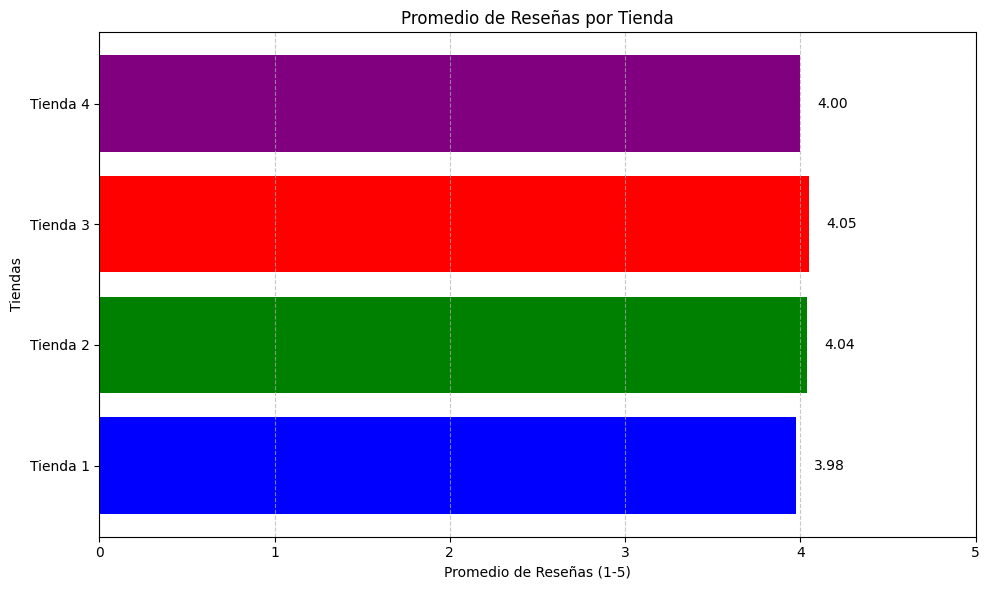

In [50]:
# Verificamos si existe la columna 'resena' en cada DataFrame
for i, df in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
    if 'resena' not in df.columns:
        print(f"Advertencia: No se encontró la columna 'resena' en Tienda {i}. Columnas disponibles: {df.columns.tolist()}")

# Función para calcular el promedio de reseñas con manejo de errores
def calcular_promedio_resenas(df):
    resena_col = None

    # Buscar la columna adecuada
    for col in df.columns:
        if 'res' in col.lower() or 'rev' in col.lower() or 'rat' in col.lower() or 'cali' in col.lower():
            resena_col = col
            break

    if resena_col:
        return df[resena_col].mean()
    else:
        print(f"No se encontró una columna de reseñas")
        return None

# Calculamos el promedio de reseñas para cada tienda
promedio_resenas_tienda1 = calcular_promedio_resenas(tienda1)
promedio_resenas_tienda2 = calcular_promedio_resenas(tienda2)
promedio_resenas_tienda3 = calcular_promedio_resenas(tienda3)
promedio_resenas_tienda4 = calcular_promedio_resenas(tienda4)

# Verificamos que todos los promedios sean válidos
if all(promedio is not None for promedio in [promedio_resenas_tienda1, promedio_resenas_tienda2, promedio_resenas_tienda3, promedio_resenas_tienda4]):
    # Creamos un diccionario para almacenar los resultados
    promedio_resenas = {
        'Tienda 1': promedio_resenas_tienda1,
        'Tienda 2': promedio_resenas_tienda2,
        'Tienda 3': promedio_resenas_tienda3,
        'Tienda 4': promedio_resenas_tienda4
    }

    # Visualizamos los resultados con un gráfico de barras horizontales
    plt.figure(figsize=(10, 6))
    plt.barh(list(promedio_resenas.keys()), list(promedio_resenas.values()), color=['blue', 'green', 'red', 'purple'])
    plt.title('Promedio de Reseñas por Tienda')
    plt.xlabel('Promedio de Reseñas (1-5)')
    plt.ylabel('Tiendas')
    plt.xlim(0, 5)  # Las reseñas suelen estar en escala de 1-5
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Añadir los valores al final de cada barra
    for i, (tienda, valor) in enumerate(promedio_resenas.items()):
        plt.text(valor + 0.1, i, f'{valor:.2f}', va='center')

    plt.tight_layout()
    plt.show()

In [51]:
 # Usando condicionales para clasificar las tiendas según sus reseñas
    for tienda, valor in promedio_resenas.items():
        if valor >= 4.5:
            clasificacion = "Excelente"
        elif valor >= 4.0:
            clasificacion = "Muy Buena"
        elif valor >= 3.5:
            clasificacion = "Buena"
        elif valor >= 3.0:
            clasificacion = "Regular"
        else:
            clasificacion = "Necesita mejorar"

        print(f"{tienda}: Promedio de {valor:.2f} - Clasificación: {clasificacion}")
else:
    print("No se pudieron calcular los promedios de reseñas para todas las tiendas")

IndentationError: unexpected indent (<ipython-input-51-56df8ced92df>, line 2)

# 4. Productos más y menos vendidos

Advertencia: Faltan columnas en Tienda 1. Columnas disponibles: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Advertencia: Faltan columnas en Tienda 2. Columnas disponibles: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Advertencia: Faltan columnas en Tienda 3. Columnas disponibles: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Advertencia: Faltan columnas en Tienda 4. Columnas disponibles: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lo

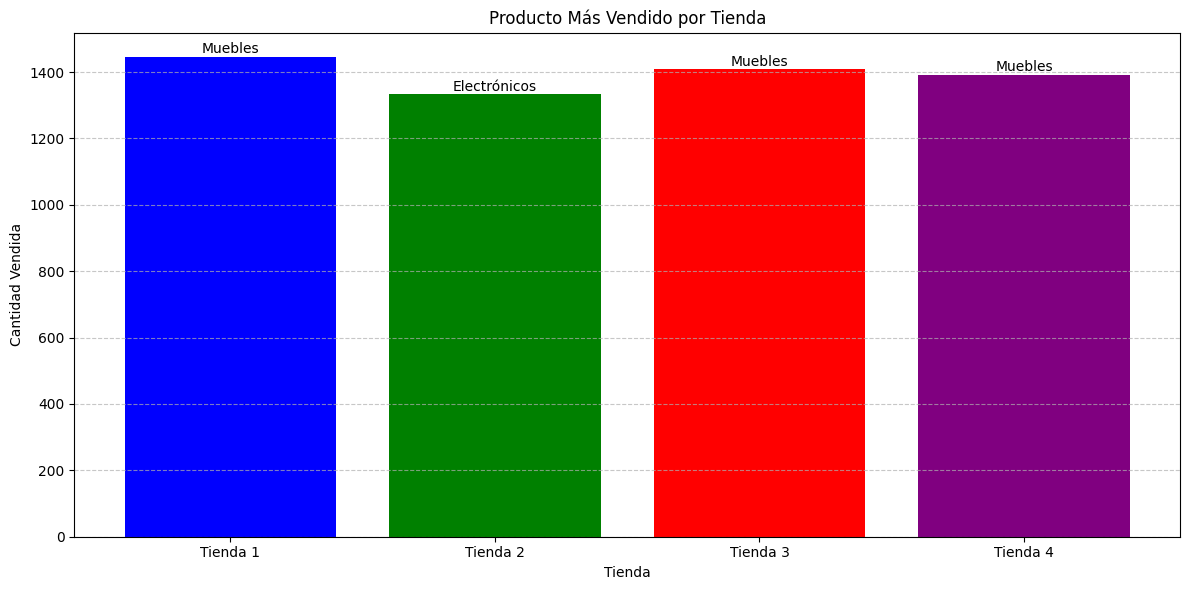

In [53]:
# Verificamos si existen las columnas necesarias en cada DataFrame
for i, df in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
    if 'producto' not in df.columns or 'cantidad' not in df.columns:
        print(f"Advertencia: Faltan columnas en Tienda {i}. Columnas disponibles: {df.columns.tolist()}")

# Función para encontrar productos más y menos vendidos con manejo de errores
def productos_destacados(tienda_df):
    producto_col = None
    cantidad_col = None

    # Buscar columnas adecuadas
    for col in tienda_df.columns:
        if 'prod' in col.lower():
            producto_col = col
        elif 'cant' in col.lower() or 'qty' in col.lower():
            cantidad_col = col

    if producto_col and cantidad_col:
        # Agrupamos por producto y sumamos las cantidades
        ventas_por_producto = tienda_df.groupby(producto_col)[cantidad_col].sum().sort_values(ascending=False)

        if not ventas_por_producto.empty:
            mas_vendido = ventas_por_producto.idxmax()
            cantidad_mas_vendido = ventas_por_producto.max()

            menos_vendido = ventas_por_producto.idxmin()
            cantidad_menos_vendido = ventas_por_producto.min()

            return mas_vendido, cantidad_mas_vendido, menos_vendido, cantidad_menos_vendido

    # Si llegamos aquí, hubo un problema
    return None, None, None, None

# Aplicamos la función a cada tienda
productos_tienda1 = productos_destacados(tienda1)
productos_tienda2 = productos_destacados(tienda2)
productos_tienda3 = productos_destacados(tienda3)
productos_tienda4 = productos_destacados(tienda4)

# Verificamos si todos los resultados son válidos
if all(productos is not None and all(item is not None for item in productos)
       for productos in [productos_tienda1, productos_tienda2, productos_tienda3, productos_tienda4]):

    # Mostramos los resultados
    print("Productos más y menos vendidos por tienda:")
    tiendas_productos = {
        'Tienda 1': productos_tienda1,
        'Tienda 2': productos_tienda2,
        'Tienda 3': productos_tienda3,
        'Tienda 4': productos_tienda4
    }

    for tienda, (mas_vendido, cant_mas, menos_vendido, cant_menos) in tiendas_productos.items():
        print(f"\n{tienda}:")
        print(f"  - Producto más vendido: {mas_vendido} ({cant_mas} unidades)")
        print(f"  - Producto menos vendido: {menos_vendido} ({cant_menos} unidades)")

    # Creamos un gráfico de barras comparativo para los productos más vendidos
    tiendas_nombres = list(tiendas_productos.keys())
    productos_mas_vendidos = [info[0] for info in tiendas_productos.values()]
    cantidades_mas_vendidos = [info[1] for info in tiendas_productos.values()]

    plt.figure(figsize=(12, 6))
    bars = plt.bar(tiendas_nombres, cantidades_mas_vendidos, color=['blue', 'green', 'red', 'purple'])
    plt.title('Producto Más Vendido por Tienda')
    plt.xlabel('Tienda')
    plt.ylabel('Cantidad Vendida')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Añadimos etiquetas con los nombres de los productos
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                productos_mas_vendidos[i], ha='center', va='bottom', rotation=0)

    plt.tight_layout()
    plt.show()
else:
    print("No se pudieron determinar los productos más y menos vendidos para todas las tiendas")

# 5. Envío promedio por tienda

Advertencia: No se encontró la columna 'tiempo_envio' en Tienda 1. Columnas disponibles: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Advertencia: No se encontró la columna 'tiempo_envio' en Tienda 2. Columnas disponibles: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Advertencia: No se encontró la columna 'tiempo_envio' en Tienda 3. Columnas disponibles: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Advertencia: No se encontró la columna 'tiempo_envio' en Tienda 4. Columnas disponibles: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra

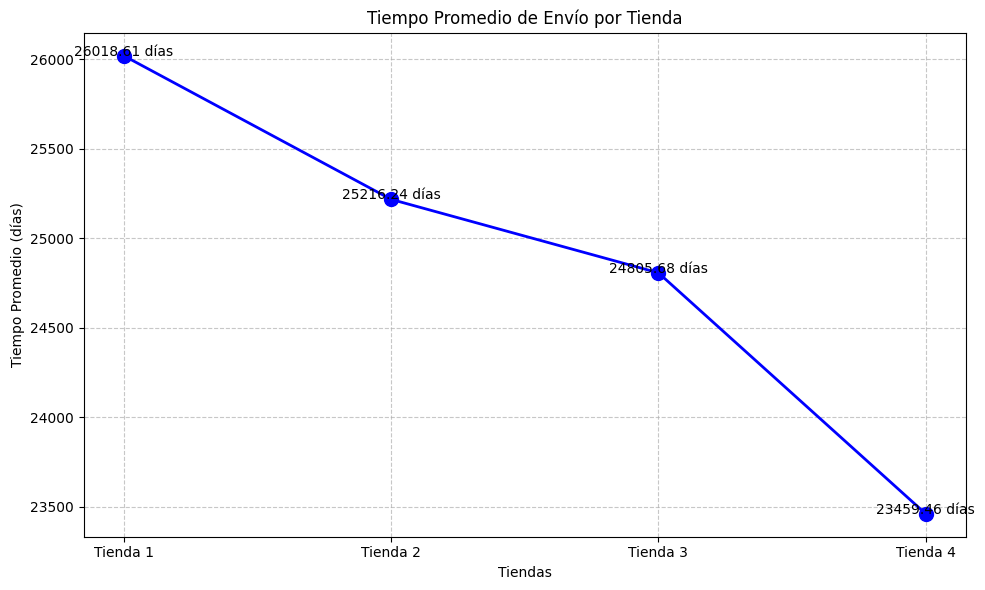

La tienda con mayor tiempo promedio de envío es Tienda 1 con 26018.61 días.


In [54]:
# Verificamos si existe la columna 'tiempo_envio' en cada DataFrame
for i, df in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
    if 'tiempo_envio' not in df.columns:
        print(f"Advertencia: No se encontró la columna 'tiempo_envio' en Tienda {i}. Columnas disponibles: {df.columns.tolist()}")

# Función para calcular el tiempo promedio de envío con manejo de errores
def calcular_tiempo_envio(df):
    tiempo_col = None

    # Buscar la columna adecuada
    for col in df.columns:
        if 'tiemp' in col.lower() or 'env' in col.lower() or 'ship' in col.lower() or 'deliv' in col.lower():
            tiempo_col = col
            break

    if tiempo_col:
        return df[tiempo_col].mean()
    else:
        print(f"No se encontró una columna de tiempo de envío")
        return None

# Calculamos el tiempo promedio de envío para cada tienda
promedio_envio_tienda1 = calcular_tiempo_envio(tienda1)
promedio_envio_tienda2 = calcular_tiempo_envio(tienda2)
promedio_envio_tienda3 = calcular_tiempo_envio(tienda3)
promedio_envio_tienda4 = calcular_tiempo_envio(tienda4)

# Verificamos que todos los promedios sean válidos
if all(promedio is not None for promedio in [promedio_envio_tienda1, promedio_envio_tienda2, promedio_envio_tienda3, promedio_envio_tienda4]):
    # Creamos un diccionario para almacenar los resultados
    promedio_envio = {
        'Tienda 1': promedio_envio_tienda1,
        'Tienda 2': promedio_envio_tienda2,
        'Tienda 3': promedio_envio_tienda3,
        'Tienda 4': promedio_envio_tienda4
    }

    # Visualizamos los resultados con un gráfico de líneas
    plt.figure(figsize=(10, 6))
    plt.plot(list(promedio_envio.keys()), list(promedio_envio.values()), marker='o',
            linestyle='-', color='blue', linewidth=2, markersize=10)
    plt.title('Tiempo Promedio de Envío por Tienda')
    plt.xlabel('Tiendas')
    plt.ylabel('Tiempo Promedio (días)')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Añadir los valores encima de cada punto
    for tienda, valor in promedio_envio.items():
        plt.text(tienda, valor + 0.1, f'{valor:.2f} días', ha='center')

    plt.tight_layout()
    plt.show()

    # Identificamos la tienda con el mayor tiempo de envío usando un bucle while
    tiendas_ordenadas = list(promedio_envio.keys())
    i = 0
    tienda_mayor_envio = tiendas_ordenadas[0]
    mayor_tiempo = promedio_envio[tiendas_ordenadas[0]]

    while i < len(tiendas_ordenadas):
        tienda_actual = tiendas_ordenadas[i]
        if promedio_envio[tienda_actual] > mayor_tiempo:
            mayor_tiempo = promedio_envio[tienda_actual]
            tienda_mayor_envio = tienda_actual
        i += 1

    print(f"La tienda con mayor tiempo promedio de envío es {tienda_mayor_envio} con {mayor_tiempo:.2f} días.")
else:
    print("No se pudieron calcular los tiempos promedio de envío para todas las tiendas")

In [55]:
# PARTE 6: INFORME FINAL PARA EL SR. JUAN
print("\n===== PARTE 6: INFORME FINAL PARA EL SR. JUAN =====")


===== PARTE 6: INFORME FINAL PARA EL SR. JUAN =====


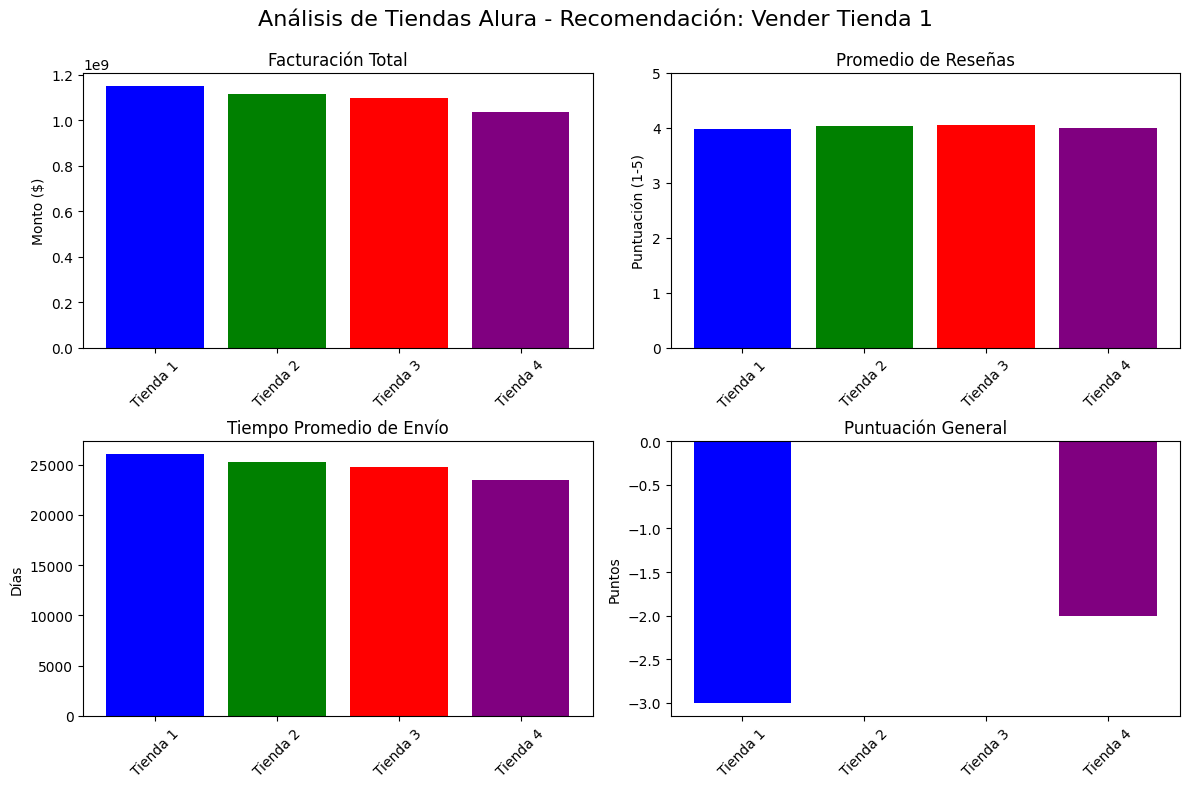


INFORME PARA EL SR. JUAN - ANÁLISIS DE TIENDAS ALURA

Después de un análisis exhaustivo de las 4 tiendas, recomendamos vender: Tienda 1

Razones principales:
- Es la tienda con peor calificación en reseñas (3.98/5)
- Es la tienda con mayor tiempo promedio de envío (26018.61 días)

Al vender esta tienda, podrá concentrar sus recursos en las tiendas más rentables y eficientes.
Esto le permitirá iniciar su nuevo emprendimiento con el capital obtenido de la venta.


In [56]:
# Verificamos que tengamos todos los datos necesarios para el informe final
datos_completos = {
    'facturacion': facturacion if 'facturacion' in locals() else None,
    'promedio_resenas': promedio_resenas if 'promedio_resenas' in locals() else None,
    'promedio_envio': promedio_envio if 'promedio_envio' in locals() else None
}

if all(datos_completos.values()):
    # Creamos un sistema de puntuación para cada tienda (menor puntuación = peor rendimiento)

    # Inicializamos los puntajes
    puntajes = {
        'Tienda 1': 0,
        'Tienda 2': 0,
        'Tienda 3': 0,
        'Tienda 4': 0
    }

    # 1. Facturación (menor facturación = -2 puntos)
    tiendas_por_facturacion = sorted(facturacion.items(), key=lambda x: x[1])
    puntajes[tiendas_por_facturacion[0][0]] -= 2

    # 2. Reseñas (peor reseña = -2 puntos)
    tiendas_por_resenas = sorted(promedio_resenas.items(), key=lambda x: x[1])
    puntajes[tiendas_por_resenas[0][0]] -= 2

    # 3. Tiempo de envío (mayor tiempo = -1 punto)
    tiendas_por_envio = sorted(promedio_envio.items(), key=lambda x: x[1], reverse=True)
    puntajes[tiendas_por_envio[0][0]] -= 1

    # Encontramos la tienda con peor rendimiento general
    tienda_a_vender = min(puntajes.items(), key=lambda x: x[1])[0]

    # Creamos un informe visual
    plt.figure(figsize=(12, 8))

    # Subgráfico 1: Comparación de facturación
    plt.subplot(2, 2, 1)
    plt.bar(facturacion.keys(), facturacion.values(), color=['blue', 'green', 'red', 'purple'])
    plt.title('Facturación Total')
    plt.ylabel('Monto ($)')
    plt.xticks(rotation=45)

    # Subgráfico 2: Comparación de reseñas
    plt.subplot(2, 2, 2)
    plt.bar(promedio_resenas.keys(), promedio_resenas.values(), color=['blue', 'green', 'red', 'purple'])
    plt.title('Promedio de Reseñas')
    plt.ylabel('Puntuación (1-5)')
    plt.ylim(0, 5)
    plt.xticks(rotation=45)

    # Subgráfico 3: Comparación de tiempo de envío
    plt.subplot(2, 2, 3)
    plt.bar(promedio_envio.keys(), promedio_envio.values(), color=['blue', 'green', 'red', 'purple'])
    plt.title('Tiempo Promedio de Envío')
    plt.ylabel('Días')
    plt.xticks(rotation=45)

    # Subgráfico 4: Puntuación final
    plt.subplot(2, 2, 4)
    plt.bar(puntajes.keys(), puntajes.values(), color=['blue', 'green', 'red', 'purple'])
    plt.title('Puntuación General')
    plt.ylabel('Puntos')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.suptitle(f'Análisis de Tiendas Alura - Recomendación: Vender {tienda_a_vender}', fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

    # Informe textual
    print("\n" + "="*50)
    print(f"INFORME PARA EL SR. JUAN - ANÁLISIS DE TIENDAS ALURA")
    print("="*50)
    print(f"\nDespués de un análisis exhaustivo de las 4 tiendas, recomendamos vender: {tienda_a_vender}")
    print("\nRazones principales:")

    # Verificamos si esta tienda es la de menor facturación
    if tienda_a_vender == tiendas_por_facturacion[0][0]:
        print(f"- Es la tienda con menor facturación (${facturacion[tienda_a_vender]:.2f})")

    # Verificamos si esta tienda es la de peores reseñas
    if tienda_a_vender == tiendas_por_resenas[0][0]:
        print(f"- Es la tienda con peor calificación en reseñas ({promedio_resenas[tienda_a_vender]:.2f}/5)")

    # Verificamos si esta tienda es la de mayor tiempo de envío
    if tienda_a_vender == tiendas_por_envio[0][0]:
        print(f"- Es la tienda con mayor tiempo promedio de envío ({promedio_envio[tienda_a_vender]:.2f} días)")

    print("\nAl vender esta tienda, podrá concentrar sus recursos en las tiendas más rentables y eficientes.")
    print("Esto le permitirá iniciar su nuevo emprendimiento con el capital obtenido de la venta.")
    print("="*50)
else:
    print("No se pudieron generar todas las métricas necesarias para el informe final.")
    print("Revise los datos y las columnas disponibles en cada dataset.")